# Use of Clustering Algorithm with CNN to Categorize images inside different folders on OS based on distance measures

In [1]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Dropout
import cv2
# load the model
# load an image from file
model = Sequential()
model.add(VGG16(include_top=False, pooling='avg', weights="imagenet"))
model.layers[0].trainable = False


Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [3]:
import glob
import numpy as np
from keras.applications.vgg16 import preprocess_input
def extract_vector(path):
    VGG_featlist=[]
    imname=[]
    for im in glob.glob(path):
        imname.append(im)
        im = cv2.imread(im)
        im = cv2.resize(im,(224,224))
        img = preprocess_input(np.expand_dims(im.copy(), axis=0))
        vgg_feature=model.predict(img)
        vgg_feature_np = np.array(vgg_feature)
        VGG_featlist.append(vgg_feature_np.flatten())
    return np.array(VGG_featlist),imname

In [4]:
path='Images'+"/*.jpg"
array,imname=extract_vector(path)

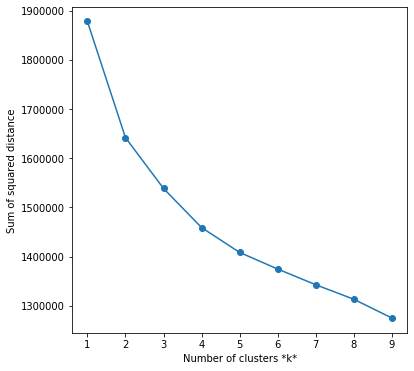

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(array)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

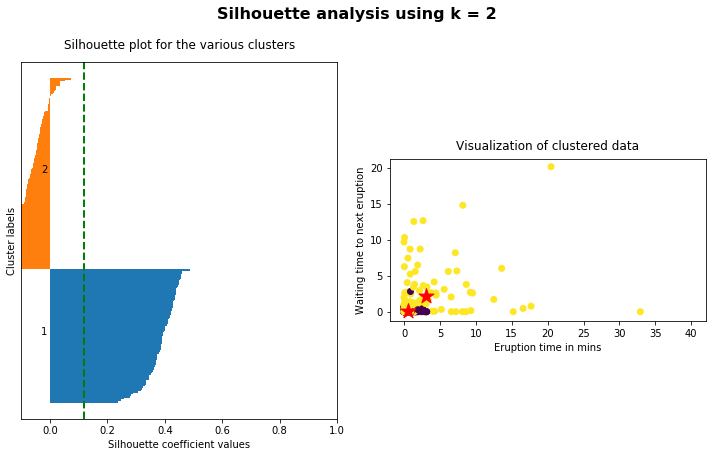

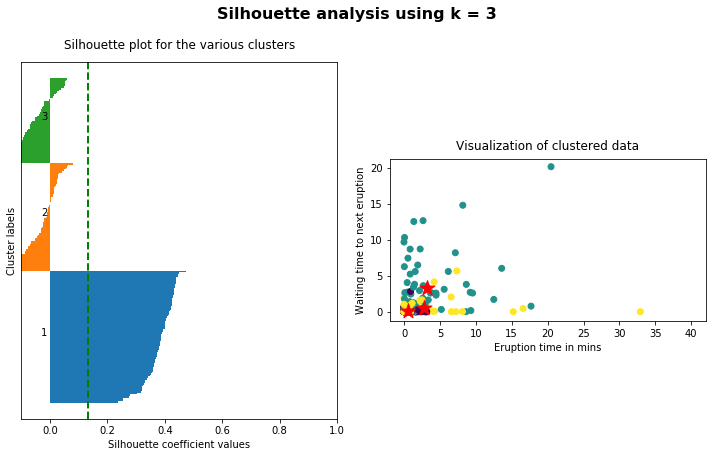

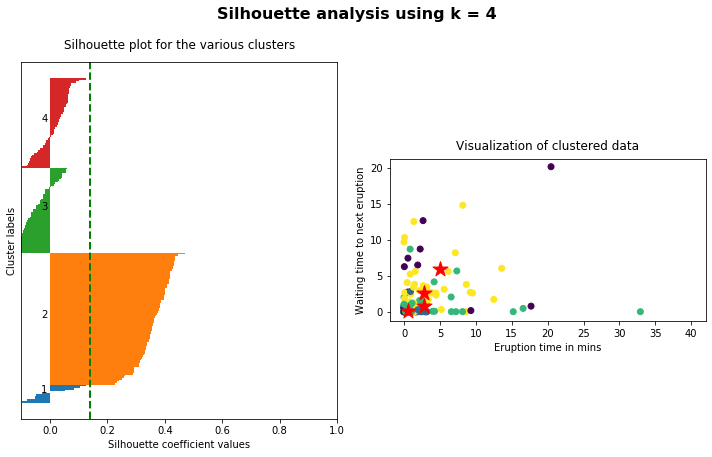

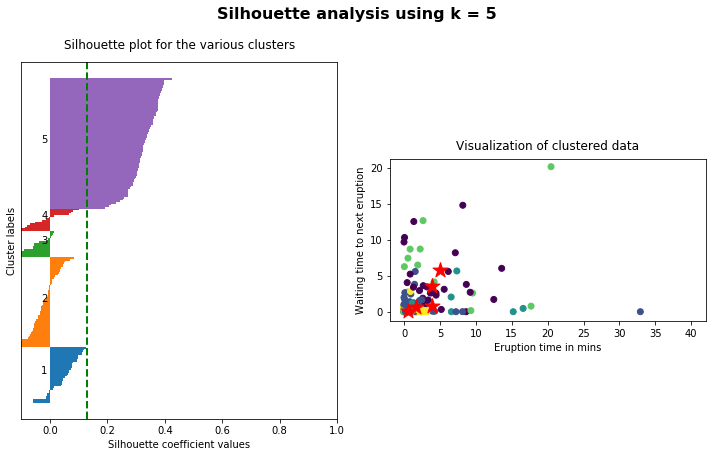

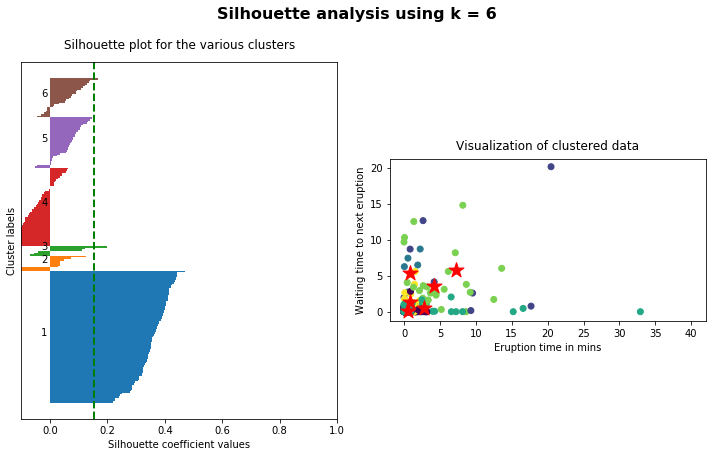

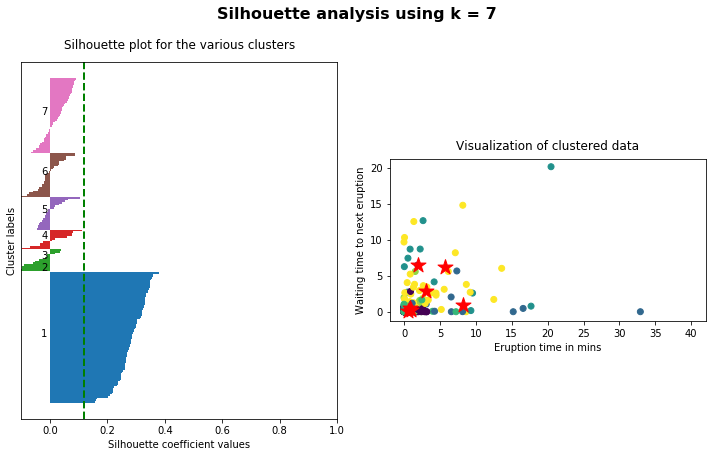

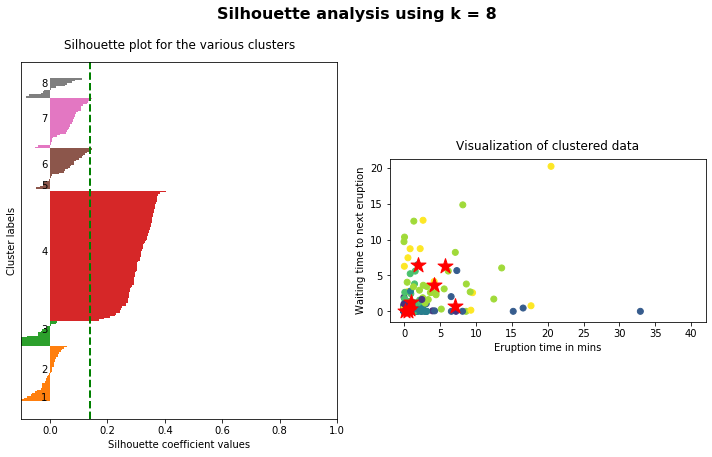

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i, k in enumerate([2,3,4,5,6,7,8]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10,6)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(array)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(array, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(array[:, 0], array[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 42])
    ax2.set_xlim([-2, 42])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
centroids = kmeans.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(array[kmeans.labels_ == 0, 0], array[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(array[kmeans.labels_ == 1, 0], array[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7,random_state=0).fit(array)

In [9]:
X=kmeans.labels_
r=np.where(X==0)[0]
s=np.where(X==1)[0]
t=np.where(X==2)[0]
u=np.where(X==3)[0]
v=np.where(X==4)[0]
w=np.where(X==5)[0]
x=np.where(X==6)[0]
#y=np.where(X==7)[0]

In [10]:
rn=[]
for i in r:
    rn.append(imname[i])

In [11]:
sn=[]
for i in s:
    sn.append(imname[i])

In [12]:
tn=[]
for i in t:
    tn.append(imname[i])

In [13]:
un=[]
for i in u:
    un.append(imname[i])

In [14]:
vn=[]
for i in v:
    vn.append(imname[i])

In [15]:
wn=[]
for i in w:
    wn.append(imname[i])
    
xn=[]
for i in x:
    xn.append(imname[i])
'''    
yn=[]
for i in y:
    yn.append(imname[i])    
'''

'    \nyn=[]\nfor i in y:\n    yn.append(imname[i])    \n'

In [16]:
import shutil, os
import cv2
import os
dir = os.path.join('Images'+"/f1")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in rn:
    shutil.move(f,'Images'+'/f1')

In [17]:
import cv2
import os
dir = os.path.join('Images'+"/f2")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in sn:
    shutil.move(f,'Images'+'/f2')

In [18]:
import cv2
import os
dir = os.path.join('Images'+"/f3")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in tn:
    shutil.move(f,'Images'+'/f3')

In [19]:
import cv2
import os
dir = os.path.join('Images'+"/f4")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in un:
    shutil.move(f,'Images'+'/f4')

In [20]:
import cv2
import os
dir = os.path.join('Images'+"/f5")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in vn:
    shutil.move(f,'Images'+'/f5')


In [21]:
import cv2
import os
dir = os.path.join('Images'+"/f6")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in wn:
    shutil.move(f,'Images'+'/f6')

In [22]:
import cv2
import os
dir = os.path.join('Images'+"/f7")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in xn:
    shutil.move(f,'Images'+'/f7')

In [36]:
import cv2
import os
dir = os.path.join('Images'+"/f8")
if not os.path.exists(dir):
    os.mkdir(dir)
for f in yn:
    shutil.move(f,'Images'+'/f8')